# <u> Project: Investigate a Dataset <b>No-show appointments</b></u>
###  This analisys is based on "No-show appointments"  document, which has a record of some medical appointments made in Brazil. The objective is identify the principal trends related to the next question: 
# <b> Why do people fail with their medical appointment? </b>

Some initial questions are: 
1. Who miss their appointments the most? Men or women? 
2. Do people with particular diseases/conditions have more absence rates rather than others?
3. Are the beneficiaries (scholarship) who miss their appointments the most?
4. Is people who received reminder SMS those who miss their appointments the least?
5. Are young/elderly people who miss their appointments the most? 
6. What weekday people miss their appointments the most?

In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r"C:\Users\GeoBlast\OneDrive - usach.cl\CURSO UDACITY\proy3\noshowappointments-kagglev2-may-2016.csv")
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


##### With df.info(), we can see the main features of this csv. Apparently, there is not missing values.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.dropna(inplace = True)
df.shape

(110527, 14)

#### Now, the .csv file does not have NAN values. 
#### The next step is to drop unnecessary data (AppointmentID and PatientID)

In [8]:
df_d = df.drop(columns = ['PatientId', 'AppointmentID'])

In [9]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


#### Next step: Renaming columns, to keep the writing standard:

In [10]:
df_d.rename(columns = {'No-show': 'no_show'}, inplace = True)
df_d

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [11]:
df_d.columns = map(str.lower, df_d.columns)
df_d.rename(columns = {'scheduledday': 'scheduled_day', 'appointmentday': 'appointment_day'}, inplace = True)
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gender           110527 non-null  object
 1   scheduled_day    110527 non-null  object
 2   appointment_day  110527 non-null  object
 3   age              110527 non-null  int64 
 4   neighbourhood    110527 non-null  object
 5   scholarship      110527 non-null  int64 
 6   hipertension     110527 non-null  int64 
 7   diabetes         110527 non-null  int64 
 8   alcoholism       110527 non-null  int64 
 9   handcap          110527 non-null  int64 
 10  sms_received     110527 non-null  int64 
 11  no_show          110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


#### As we can see in df_d.info(),  scheduled_day and appointment_day are described as OBJECTS, but datetime format is required to work with them. So: 

In [12]:
df_d['scheduled_day'] = pd.to_datetime(df_d['scheduled_day'])
df_d['appointment_day'] = pd.to_datetime(df_d['appointment_day'])
df_d

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### After seeing the values in appointment_day column, It turns out that it is not possible to classify by hour: apparently, people was not allowed to "reserve" a specific hour...

#### Also, it is necessary to drop duplicated rows:

In [13]:
df_d.drop_duplicates(inplace = True)
df_d.duplicated().sum()

0

#### After that, there is no longer duplicate entries. 
### Analysis:  Who miss their appointments the most? Men or women? 
Firstly, it is necessary to estimate the total of missed appointments, and how much is from the total of appointments.

In [14]:
absence = df_d.query('no_show == "Yes"')
present = df_d.query('no_show == "No"')
total = df_d.shape[0]
print('{} appointments were lost, a {}% of the total({}).'.format(absence['no_show'].count(), round(100 *absence['no_show'].count() / total, 1), total))

22098 appointments were lost, a 20.1% of the total(109892).


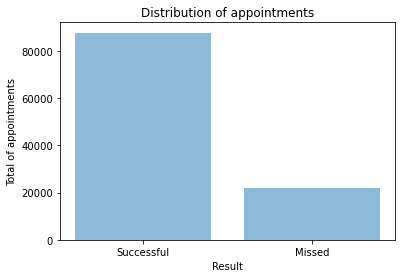

In [15]:
height = [present['no_show'].count(), absence['no_show'].count()]

plt.bar(["Successful", "Missed"], height, alpha = 0.5)
plt.title("Distribution of appointments")
plt.xlabel("Result")
plt.ylabel("Total of appointments");


In [16]:
F = df_d['gender'].value_counts()[0]
M = df_d['gender'].value_counts()[1]

print("Total entries: {}, where {} ({}%) are women and {} ({}%) are men".format(total, F, round(100 * F/total, 1), M, round(100 * M/total, 1)))

Total entries: 109892, where 71417 (65.0%) are women and 38475 (35.0%) are men


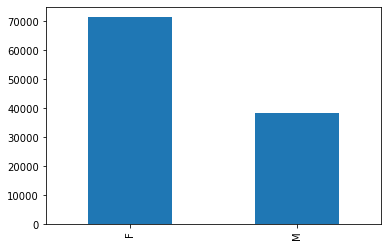

In [17]:
df_d['gender'].value_counts().plot(kind = 'bar');

#### In the next cell, data will be classified to analyze the absence based on gender: 

In [18]:
df_g = df_d.groupby(['no_show'])['gender'].value_counts()
df_g

no_show  gender
No       F         56962
         M         30832
Yes      F         14455
         M          7643
Name: gender, dtype: int64

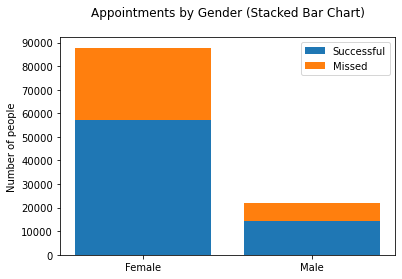

In [35]:
# credits to "Stacked Bar Chart": https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
# credits to "How to specify Y Values?" https://stackoverflow.com/questions/21393802/python-matplotlib-how-to-specify-values-on-y-axis

labels = ['Female', 'Male']
women = [56962, 14455]
man = [30832, 7643]

def plotting(labels, height_1, height_2, name_plot, ymin, ymax, ystep):
    fig, ax = plt.subplots()
    ax.bar(labels, height_1, label = 'Successful')
    ax.bar(labels, height_2, bottom = height_1, label = 'Missed')
    ax.set_ylabel('Number of people')
    plt.yticks(np.arange(ymin, ymax, ystep))
    ax.set_title(name_plot + ' (Stacked Bar Chart)\n')
    ax.legend()
    plt.show()

plotting(labels, women, man, 'Appointments by Gender', 0, 100000, 10000)

From the total of medical appointment booked by women (71'417), 14'455 (20.2%) were missed, while the missed appointments between bookings made by men (38'475) is 7'643 (19.9%).


### Analysis: Do people with particular diseases/conditions have more absence rates rather than others?

 #### 1) Handcap

In [23]:
df_d['handcap'].value_counts()

0    107673
1      2023
2       182
3        11
4         3
Name: handcap, dtype: int64

##### Looking for definitions about numbers in _hancap_ column, (Please go to https://www.kaggle.com/joniarrobanoshowappointments/discussion/202717 for more details), it turns out that, apparently, handcap and SMS_received columns were swapped. So, for practical purposes, any number except 0, will be considered as a representative of a patient with disability.


In [24]:
for c in range(1,5):
    df_d['handcap'].replace(c, 1, inplace = True)

df_d['handcap'].value_counts()

0    107673
1      2219
Name: handcap, dtype: int64

Grouping by if people missed their appointments:

In [25]:
df_handcap = df_d.groupby(['no_show'])['handcap'].value_counts()
df_handcap

no_show  handcap
No       0          85974
         1           1820
Yes      0          21699
         1            399
Name: handcap, dtype: int64

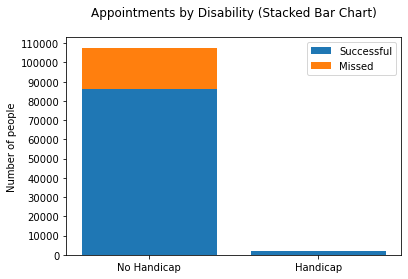

In [37]:
labels = ['No Handicap', 'Handicap']
height_1 = [df_handcap[0], df_handcap[1]]
height_2 = [df_handcap[2], df_handcap[3]]

plotting(labels, height_1, height_2,  'Appointments by Disability', 0, 111000, 10000)


In [27]:
prop_no_han = df_handcap[2] / (df_handcap[0] + df_handcap[2])
prop_han = df_handcap[3] / (df_handcap[1] + df_handcap[3])

print('The proportion between handicapped and no handcapped missed appointments are: {}% and {}% respectively.'.format(round(100*prop_han, 1), round(100*prop_no_han), 1)) 

The proportion between handicapped and no handcapped missed appointments are: 18.0% and 20% respectively.


For disabled patients-based conclusions, please go to Conclusions (at the end of this document)



#### 2) Patients with Diabetes:

In [28]:
df_diabetes = df_d.groupby(['no_show'])['diabetes'].value_counts()
df_diabetes

no_show  diabetes
No       0           81323
         1            6471
Yes      0           20676
         1            1422
Name: diabetes, dtype: int64

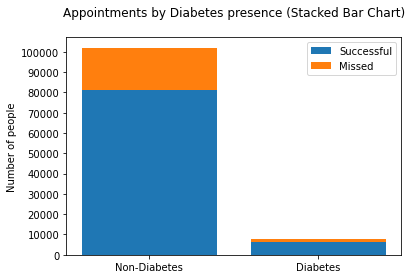

In [54]:
labels = ['Non-Diabetes', 'Diabetes']
no_dia = [df_diabetes[0], df_diabetes[1]]
yes_dia = [df_diabetes[2], df_diabetes[3]]

plotting(labels, no_dia, yes_dia, 'Appointments by Diabetes presence', 0, 110000, 10000)


In [42]:
prop_no_dia = df_diabetes[2] / (df_diabetes[0] + df_diabetes[2])
prop_dia = df_diabetes[3] / (df_diabetes[1] + df_diabetes[3])

print('The proportion of missed appointments between diabetic and non-diabetic patients are: {}% and {}% respectively.'.format(round(100*prop_dia, 1), round(100*prop_no_dia), 1)) 

The proportion of missed appointments between diabetic and non-diabetic patients are: 18.0% and 20% respectively.


#### 3) Alcoholism

In [43]:
df_alc = df_d.groupby(['no_show'])['alcoholism'].value_counts()
df_alc

no_show  alcoholism
No       0             85118
         1              2676
Yes      0             21430
         1               668
Name: alcoholism, dtype: int64

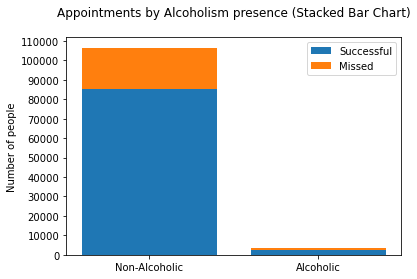

In [51]:
labels = ['Non-Alcoholic', 'Alcoholic']
no_alc = [df_alc[0], df_alc[1]]
yes_alc = [df_alc[2], df_alc[3]]

plotting(labels, no_alc, yes_alc, 'Appointments by Alcoholism presence', 0, 111000, 10000)


In [45]:
prop_no_alc = df_alc[2] / (df_alc[0] + df_alc[2])
prop_alc = df_alc[3] / (df_alc[1] + df_alc[3])

print('The proportion of missed appointments between alcoholic and non-alcoholic patients are: {}% and {}% respectively.'.format(round(100*prop_alc, 1), round(100*prop_no_alc), 1)) 

The proportion of missed appointments between alcoholic and non-alcoholic patients are: 20.0% and 20% respectively.


#### 4. Hipertension

In [46]:
df_hiper = df_d.groupby(['no_show'])['hipertension'].value_counts()
df_hiper

no_show  hipertension
No       0               69846
         1               17948
Yes      0               18370
         1                3728
Name: hipertension, dtype: int64

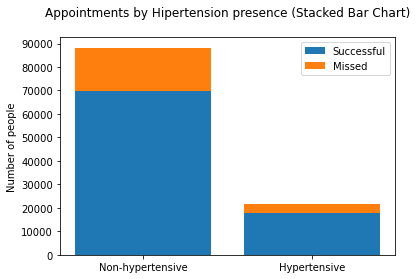

In [49]:
labels = ['Non-hypertensive', 'Hypertensive']
no_hiper = [df_hiper[0], df_hiper[1]]
yes_hiper = [df_hiper[2], df_hiper[3]]


plotting(labels, no_hiper, yes_hiper, 'Appointments by Hipertension presence', 0, 100000, 10000)


In [55]:
prop_no_hiper = df_hiper[2] / (df_hiper[0] + df_hiper[2])
prop_hiper = df_hiper[3] / (df_hiper[1] + df_hiper[3])

print('The proportion of missed appointments between patients with hipertension and non-hypertensive patients are: {}% and {}% respectively.'.format(round(100*prop_hiper, 1), round(100*prop_no_hiper), 1)) 

The proportion of missed appointments between patients with hipertension and non-hypertensive patients are: 17.2% and 21% respectively.


### Analysis: Do people benefited with scholaships have more absence rates rather than others?

In [56]:
df_bene = df_d.groupby(['no_show'])['scholarship'].value_counts()
df_bene

no_show  scholarship
No       0              79549
         1               8245
Yes      0              19542
         1               2556
Name: scholarship, dtype: int64

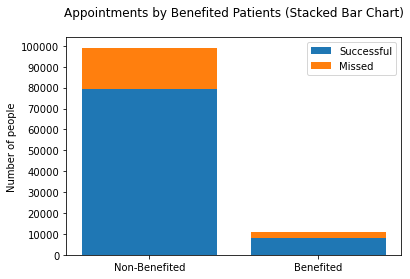

In [59]:
labels = ['Non-Benefited', 'Benefited']
no_bene = [df_bene[0], df_bene[1]]
yes_bene = [df_bene[2], df_bene[3]]

plotting(labels, no_bene, yes_bene, 'Appointments by Benefited Patients', 0, 106000, 10000)

In [60]:
prop_no_bene = df_bene[2] / (df_bene[0] + df_bene[2])
prop_bene = df_bene[3] / (df_bene[1] + df_bene[3])

print('The rate of missed appointments between patients with scholarship and non-benefited patients are: {}% and {}% respectively.'.format(round(100*prop_bene, 1), round(100*prop_no_bene), 1)) 

The rate of missed appointments between patients with scholarship and non-benefited patients are: 23.7% and 20% respectively.


### Analysis: Are SMS reminders effective?  

SMS reminders were sent to 35'482 of 109'892 patients (32.3%)

In [61]:
df_d['sms_received'].value_counts()

0    74410
1    35482
Name: sms_received, dtype: int64

In [62]:
df_sms = df_d.groupby(['no_show'])['sms_received'].value_counts()
df_sms

no_show  sms_received
No       0               62096
         1               25698
Yes      0               12314
         1                9784
Name: sms_received, dtype: int64

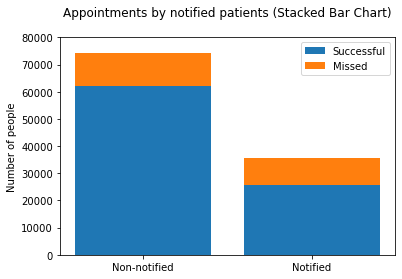

In [66]:
labels = ['Non-notified', 'Notified']
no_sms = [df_sms[0], df_sms[1]]
yes_sms = [df_sms[2], df_sms[3]]

plotting(labels, no_sms, yes_sms, 'Appointments by notified patients', 0, 81000, 10000)

In [67]:
prop_no_sms = df_sms[2] / (df_sms[0] + df_sms[2])
prop_sms = df_sms[3] / (df_sms[1] + df_sms[3])

print('The rate of missed appointments between notified patients and non-notified patients are: {}% and {}% respectively.'.format(round(100*prop_sms, 1), round(100*prop_no_sms), 1)) 

The rate of missed appointments between notified patients and non-notified patients are: 27.6% and 17% respectively.


In [87]:
df_sms_received = df_d.query('sms_received == 1')


In [86]:
df_nosms_received = df_d.query('sms_received == 0')


The difference between % in missed appointments could not be associated to a age factor. Age distribution is similar in people who received and people who did not received reminders. 

### Missed appointments by distance between scheduled day and appointment day:

We will make a disttribution of missed appointments by the difference between scheduled day and appointment day: 

In [85]:
# credits to "Substracting two date columns ..." , https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer
df_d['delta'] = (df_d['appointment_day'] - df_d['scheduled_day']).dt.days
delta = df_d.query('delta >= 0')


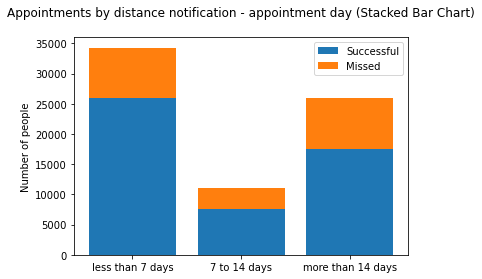

In [76]:
labels = ['less than 7 days', '7 to 14 days', 'more than 14 days']

a_week_no = delta.query(('delta <= 7 and no_show == "No"')).shape[0]
a_week_yes = delta.query('delta <= 7 and no_show == "Yes"').shape[0]
a_3_weeks_no = delta.query('delta > 14 and no_show == "No"').shape[0]
a_3_weeks_yes = delta.query('delta > 14 and no_show == "Yes"').shape[0]
a_2_weeks_no = delta.query('delta <= 14 and delta > 7 and no_show == "No"').shape[0]
a_2_weeks_yes = delta.query('delta <= 14 and delta >7 and no_show == "Yes"').shape[0]
list_no = [a_week_no, a_2_weeks_no, a_3_weeks_no]
list_yes = [a_week_yes, a_2_weeks_yes, a_3_weeks_yes]

rate_a_week = round(100 * a_week_yes / (a_week_yes + a_week_no), 2)
rate_2_week = round(100 * a_2_weeks_yes / (a_2_weeks_yes + a_2_weeks_no),2)
rate_3_week = round(100 * a_3_weeks_yes / (a_3_weeks_yes + a_3_weeks_no), 2)


plotting(labels, list_no, list_yes, 'Appointments by distance notification - appointment day', 0, 40000, 5000)



In [72]:
print('The missed appointments rate between each interval is: {}% for medical reservations with less than 7 days of difference, {}% for reservations up to 14 days and {}% for reservations booked with more than 21 days.'.format(rate_a_week, rate_2_week, rate_3_week))

The missed appointments rate between each interval is: 24.43% for medical reservations with less than 7 days of difference, 31.18% for reservations up to 14 days and 32.59% for reservations booked with more than 21 days.


### Analysis: Missed appointments by age

In [73]:
# credits to 'Conclusions using Groupby', https://classroom.udacity.com/nanodegrees/nd002-fund-gov/parts/b6d5ba91-071f-4801-8f57-1436289d1b6b/modules/05f3697f-b435-4c19-bc87-14a4a99cb695/lessons/852cac3e-f59c-4a1f-91fa-a66d031def45/concepts/d49caec2-028e-44fd-8392-5246a3b2cf11
df_age = df_d.query('age >= 0')
median = df_age['age'].median()
bin_edges = [0, 18, 30, 55, 115]
bin_names = ['1', '2', '3', '4']
df_age['interval'] = pd.cut(df_age.loc[:, 'age'], bin_edges, labels = bin_names)

<ipython-input-73-c0d4fde85172>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['interval'] = pd.cut(df_age.loc[:, 'age'], bin_edges, labels = bin_names)


In [78]:
df_interval = df_age.groupby(['no_show'])['interval'].value_counts()
df_interval.sort_index(inplace = True)
df_interval

no_show  interval
No       1           19525
         2           12550
         3           29712
         4           23112
Yes      1            5664
         2            4105
         3            7434
         4            4259
Name: interval, dtype: int64

In [88]:
labels = ['under 18', '18 to 30', '30 to 55', 'over 55']
height_no = []
height_yes = []
prop_yes = []

for c in range(len(labels)):
    height_no.append(df_interval[c])
for c in range(len(labels), 2*len(labels)):
    height_yes.append(df_interval[c])
for c in range(len(labels)):
    prop_yes.append(round(100 * height_yes[c]/(height_yes[c] + height_no[c]), 1))



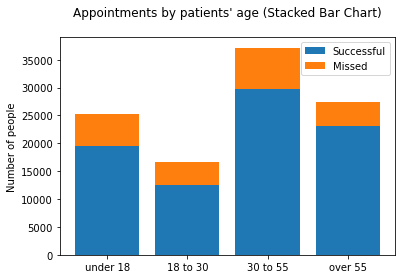

In [80]:
plotting(labels, height_no, height_yes, 'Appointments by patients\' age', 0, 40000, 5000)

In [81]:
print('The missed appointments rate between each interval is: {}% for patients under 18 years old, {}% for young adults (18-30),  {}% for adults (30 to 55 years old), and {}% in patients over 55 years old.'.format(prop_yes[0], prop_yes[1], prop_yes[2], prop_yes[3]))

The missed appointments rate between each interval is: 22.5% for patients under 18 years old, 24.6% for young adults (18-30),  20.0% for adults (30 to 55 years old), and 15.6% in patients over 55 years old.


### Analysis: Missed appointments by weekday. 

In [82]:
df_d['day'] = df_d['appointment_day'].dt.weekday
df_weekday = df_d.groupby(['no_show'])['day'].value_counts()
df_weekday.sort_index(inplace = True)
df_weekday

no_show  day
No       0      17939
         1      20408
         2      20686
         3      13862
         4      14869
         5         30
Yes      0       4635
         1       5099
         2       5053
         3       3312
         4       3990
         5          9
Name: day, dtype: int64

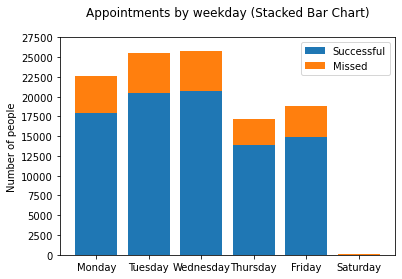

In [83]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
height_no = []
height_yes = []
prop_yes = []

for c in range(len(labels)):
    height_no.append(df_weekday[c])
    
for c in range(len(labels), 2*len(labels)):
    height_yes.append(df_weekday[c])

for c in range(len(labels)):
    prop_yes.append(round(100 * height_yes[c]/(height_yes[c] + height_no[c]), 1))
                                     
plotting(labels, height_no, height_yes, 'Appointments by weekday', 0, 28000, 2500)


In [84]:
display('The missed appointments rate by weekday are: {}% for mondays,  {}% on tuesdays, {}% wednesdays, {}% on thursdays, {}% on fridays and {}% on saturdays.'.format(prop_yes[0],prop_yes[1], prop_yes[2], prop_yes[3], prop_yes[4], prop_yes[5]))

'The missed appointments rate by weekday are: 20.5% for mondays,  20.0% on tuesdays, 19.6% wednesdays, 19.3% on thursdays, 21.2% on fridays and 23.1% on saturdays.'

## Conclusions

The database used comprises a sample of medical appointments made in Brazil, between april and july, 2016. Related to the principal scopes in this project, the most relevant one is not knowing how this data was collected (Was effectively a non-skewed gathering?) and how much is this sample from the total population.  Hence,  it is not possible to "generalize" the trends seen in this study to the statistical population.

#### Given the previous results, we can see that: 
1. From the total of medical appointment booked by women (71'417),  14'455 (20.2%) were missed, while the missed appointments between bookings made by men (38'475) is 7'643  (19.9%). It is not possible to infer that gender could affect the medical appointments' success rate. 
    
    
2. In the analysis between handicapped and non-handicapped patients, the rate of missed appointments is 18% (399 of 2219) for patients who declared a disability, while the rate between non-handicapped patients is 20% (21'699 of 107'673).
    
    
3. In the analysis between patients with diabetes, the rate of missed appointments is 18% (1'422 of 7'893) for patients who suffer from it, while the rate between non-diabetic patients is 20% (20'676 of 101'999).
    
    
4. The results between patients with alcoholism, the rate of missed appointments is 20% (668 of 3'344) for patients who suffer from it, while the rate between non-alcoholic patients is 20% (21'430 of 106'548).
    
    
5. The results obtained from hypertensive patients indicates that 17.2% (3'728 of 21'676)  of the appointments made by them were missed. While, 21% (21'430 of 88'216) of patients without Hipertension missed their appointments.



About the influence of economical benefits (Scholarships) in the rate of missed appointments, patients with scholarship use to miss 23.7% of the times. Non-benefited patients present 20% of absence. This scenario is the first one where it is possible to observe an important difference respect to the "conventional" patient (non-ill, non-benefited, etc.)


According to the rate of missed appointments between notified patients and non-notified via SMS patients, those are: 27.6% and 17% respectively. Here there is an unusual trend, because the SMS sending does not achieve its goal.


Among patients notified with a SMS reminder (and taking scheduled day column as the date when SMS was sent) : The missed appointments rate between each interval is: 24.43% for medical reservations with less than 7 days of difference, 31.18% for reservations up to 14 days and 32.59% for reservations booked with more than 21 days. There is an important finding related to the success of SMS implementation. It is advisable to resend a reminder with no more than a week in advance. It is recommendable to obtain the date/time when SMS was effectively sent to complement this scenario.


There is not important differences in missed appointments per day: thurdays present the lowest rate (19.3%) while saturdays (23.1%) and fridays (21.2%) are the days with highest failed appointment rates.

Respect to the missed appointments rate between each age range, those are the following: 22.5% for patients under 18 years old, 24.6% for young adults (18-30),  20.0% for adults (30 to 55 years old), and 15.6% in patients over 55 years old. It seems that elderly patients show more commitmment with their appointments. 

Despite the results, we can not assume they are representative of the  population. It is necessary to know if this sample is non-skewed (how was it collected, if it was systematic  gathered, etc.), and if this database is an important portion of the population. It is not possible to assume that any of the features studied in this report are causes of missing rates.
